### Overview

This notebook will be a quick introduction to python's pandas library for beginners to data science.
It will be typed out live before and audience as a code along introductory session.

<b>The learning objectives in 15 minutes:</b>
1. Learn two ways to load data into pandas
2. Exploratory data analayis
    - View Sample Data
    - Change Headers
    - Manipulate Columns and Rows
    - Find Data using statistics
    - Quick plots with pandas plot methods
3. Review learnings and possible next steps

### Imports and Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Method 1: Download csv from https://finance.yahoo.com/quote/AAPL/history?p=AAPL
aapl_sheet = pd.read_csv('./data/AAPL.csv')

In [2]:
aapl_sheet.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101087,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095813,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088780,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090978,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093615,73449600.0


In [3]:
aapl_sheet.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
10105,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900.0
10106,2021-01-12,128.500000,129.690002,126.860001,128.800003,128.800003,91951100.0
10107,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.889999,88636800.0
10108,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.910004,90221800.0
10109,2021-01-15,128.779999,130.220001,127.000000,127.139999,127.139999,111235300.0


In [4]:
aapl_sheet.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
7720,2011-07-20,14.147142,14.152500,13.785714,13.817857,11.919985,941340400.0
3423,1994-06-28,0.234375,0.242188,0.228795,0.238839,0.202401,174227200.0
5056,2000-12-13,0.277902,0.277902,0.265625,0.267857,0.231067,344887200.0
146,1981-07-14,0.106027,0.107143,0.106027,0.106027,0.083506,19779200.0
8859,2016-01-29,23.697500,24.334999,23.587500,24.334999,22.545681,257666000.0


In [5]:
aapl_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10110 non-null  object 
 1   Open       10109 non-null  float64
 2   High       10109 non-null  float64
 3   Low        10109 non-null  float64
 4   Close      10109 non-null  float64
 5   Adj Close  10109 non-null  float64
 6   Volume     10109 non-null  float64
dtypes: float64(6), object(1)
memory usage: 553.0+ KB


In [6]:
aapl_sheet.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,1.010900e+04
mean,10.047465,10.155937,9.937584,10.050526,9.499448,3.391036e+08
std,19.886890,20.119773,19.650572,19.893687,19.557589,3.418705e+08
min,0.049665,0.049665,0.049107,0.049107,0.038677,1.388800e+06
25%,0.272321,0.279018,0.265625,0.272321,0.230810,1.301968e+08
50%,0.443393,0.450714,0.434152,0.444196,0.371497,2.266600e+08
75%,11.607142,11.635715,11.482857,11.595715,10.003056,4.222512e+08
max,138.050003,138.789993,134.339996,136.690002,136.690002,7.421641e+09


In [7]:
# Method 2: Use pandas_datareader, pip3 install pandas-datareader from terminal
import pandas_datareader.data as web

In [8]:
aapl_web = web.DataReader('aapl'
                          , 'yahoo'
                          , start = '12/12/1980'
                         ).reset_index()

In [9]:
aapl_web.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101073
1,1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095800
2,1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088768
3,1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090965
4,1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093603


In [10]:
aapl_web.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
10104,2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
10105,2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003
10106,2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999
10107,2021-01-14,131.000000,128.759995,130.800003,128.910004,90221800.0,128.910004
10108,2021-01-15,130.220001,127.000000,128.779999,127.139999,111235300.0,127.139999


In [11]:
aapl_web.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close
3809,1996-01-09,0.309152,0.292411,0.309152,0.292411,251216000.0,0.252249
951,1984-09-18,0.128906,0.123326,0.127790,0.123326,97305600.0,0.097118
2001,1988-11-11,0.353795,0.343750,0.348214,0.343750,108684800.0,0.273645
6415,2006-05-16,2.437500,2.312500,2.432143,2.320714,936740000.0,2.001965
1032,1985-01-14,0.137835,0.136719,0.136719,0.136719,270435200.0,0.107665


In [12]:
aapl_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10109 non-null  datetime64[ns]
 1   High       10109 non-null  float64       
 2   Low        10109 non-null  float64       
 3   Open       10109 non-null  float64       
 4   Close      10109 non-null  float64       
 5   Volume     10109 non-null  float64       
 6   Adj Close  10109 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 553.0 KB


In [13]:
aapl_web.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10109.000000,10109.000000,10109.000000,10109.000000,1.010900e+04,10109.000000
mean,10.155937,9.937584,10.047465,10.050526,3.393486e+08,9.499442
std,20.119773,19.650572,19.886890,19.893687,3.416975e+08,19.557592
min,0.049665,0.049107,0.049665,0.049107,1.388800e+06,0.038671
25%,0.279018,0.265625,0.272321,0.272321,1.306296e+08,0.230806
50%,0.450714,0.434152,0.443393,0.444196,2.267496e+08,0.371479
75%,11.635714,11.482857,11.607143,11.595714,4.222512e+08,10.003050
max,138.789993,134.339996,138.050003,136.690002,7.421641e+09,136.690002


In [14]:
# Get Column Headers
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Manipulating DataFrames

In [15]:
# Change Headers Method 1: df.rename()
aapl_web.rename(columns = {'Adj Close': 'Adjusted Close'
                           , 'Volume': 'Daily Trade Volume'
                          }, inplace = True)
aapl_web.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Daily Trade Volume',
       'Adjusted Close'],
      dtype='object')

In [16]:
# Additional columns
aapl_web['Daily OC % Change'] = (aapl_web['Close'] - aapl_web['Open']) / aapl_web['Open'] * 100
aapl_web['Daily HL % Change'] = (aapl_web['High'] - aapl_web['Low']) / aapl_web['Low'] * 100

In [17]:
# Use specific columns
aapl_use = aapl_web[['Date', 'Close', 'Daily Trade Volume']]
aapl_use

,Date,Close,Daily Trade Volume
0,1980-12-12,0.128348,469033600.0
1,1980-12-15,0.121652,175884800.0
2,1980-12-16,0.112723,105728000.0
3,1980-12-17,0.115513,86441600.0
4,1980-12-18,0.118862,73449600.0
...,...,...,...
10104,2021-01-11,128.979996,100620900.0
10105,2021-01-12,128.800003,91951100.0
10106,2021-01-13,130.889999,88636800.0
10107,2021-01-14,128.910004,90221800.0


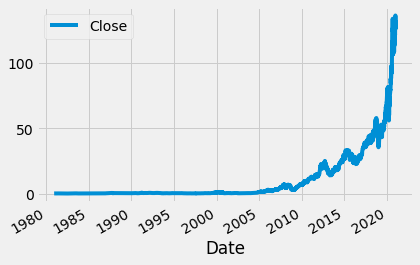

In [18]:
aapl_use.plot(x='Date'
              , y='Close'
             );